# **Imports**

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# **Reading Data**

In [2]:
df = pd.read_csv('../Data/final_combined_data.csv')

# **Feature Engineering**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   5000 non-null   float64
 1   Longitude                  5000 non-null   float64
 2   Altitude                   5000 non-null   float64
 3   Distance                   5000 non-null   float64
 4   Alignment                  5000 non-null   bool   
 5   Distance_Sensors           5000 non-null   float64
 6   Proximity                  5000 non-null   bool   
 7   Wheel_Speed                5000 non-null   float64
 8   Velocity                   5000 non-null   float64
 9   Hall_Effect                5000 non-null   bool   
 10  Emergency_Stop             5000 non-null   bool   
 11  Temperature                5000 non-null   float64
 12  Humidity                   5000 non-null   float64
 13  Light_Level                5000 non-null   float

In [4]:
df.columns

Index(['Latitude', 'Longitude', 'Altitude', 'Distance', 'Alignment',
       'Distance_Sensors', 'Proximity', 'Wheel_Speed', 'Velocity',
       'Hall_Effect', 'Emergency_Stop', 'Temperature', 'Humidity',
       'Light_Level', 'Alignment_Label', 'Safety_Label',
       'Collision_Avoidance_Label', 'Chaining_Unchaining_Label'],
      dtype='object')

In [6]:
# Relative Position and Angle
df["Relative_Distance"] = df["Distance"].diff()
df["Relative_Angle"] = df["Longitude"].diff()

In [7]:
# Relative Velocity
df["Relative_Velocity"] = df["Velocity"].diff()

In [8]:
# Time Series Features
window_size = 10
df["Rolling_Mean_Wheel_Speed"] = df["Wheel_Speed"].rolling(window=window_size).mean()
df["Rolling_Max_Distance"] = df["Distance"].rolling(window=window_size).max()

In [10]:
# Safety and Emergency Features
df["Safety_Activation"] = (df["Hall_Effect"] | df["Emergency_Stop"]).astype(int)
df["Safety_Duration"] = df.groupby((df["Safety_Activation"] != df["Safety_Activation"].shift()).cumsum())["Safety_Activation"].cumcount()


In [11]:
# Environmental Conditions Interaction
df["Temp_Humidity_Interact"] = df["Temperature"] * df["Humidity"]
df["Light_Temp_Interact"] = df["Light_Level"] * df["Temperature"]

In [12]:
# Alignment and Proximity Trends
window_size = 10
df["Alignment_Percentage"] = df["Alignment"].rolling(window=window_size).mean() * 100
df["Proximity_Trend"] = df["Proximity"].rolling(window=window_size).sum()

In [13]:
# Interaction Features
df["Alignment_Velocity_Interaction"] = df["Alignment"] * df["Velocity"]

In [14]:
# Estimate time to collision
df["Time_To_Collision"] = df["Distance"] / df["Velocity"]

In [ ]:
# Save the updated combined data with new features to a new CSV file
# df.to_csv("combined_data_with_features.csv", index=False)

print("Combined data with new features saved.")

In [15]:
df.columns

Index(['Latitude', 'Longitude', 'Altitude', 'Distance', 'Alignment',
       'Distance_Sensors', 'Proximity', 'Wheel_Speed', 'Velocity',
       'Hall_Effect', 'Emergency_Stop', 'Temperature', 'Humidity',
       'Light_Level', 'Alignment_Label', 'Safety_Label',
       'Collision_Avoidance_Label', 'Chaining_Unchaining_Label',
       'Relative_Distance', 'Relative_Angle', 'Relative_Velocity',
       'Rolling_Mean_Wheel_Speed', 'Rolling_Max_Distance', 'Safety_Activation',
       'Safety_Duration', 'Temp_Humidity_Interact', 'Light_Temp_Interact',
       'Alignment_Percentage', 'Proximity_Trend',
       'Alignment_Velocity_Interaction', 'Time_To_Collision'],
      dtype='object')

In [17]:
df.shape

(5000, 31)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        5000 non-null   float64
 1   Longitude                       5000 non-null   float64
 2   Altitude                        5000 non-null   float64
 3   Distance                        5000 non-null   float64
 4   Alignment                       5000 non-null   bool   
 5   Distance_Sensors                5000 non-null   float64
 6   Proximity                       5000 non-null   bool   
 7   Wheel_Speed                     5000 non-null   float64
 8   Velocity                        5000 non-null   float64
 9   Hall_Effect                     5000 non-null   bool   
 10  Emergency_Stop                  5000 non-null   bool   
 11  Temperature                     5000 non-null   float64
 12  Humidity                        50

In [41]:
df.isna().sum()

Latitude                          0
Longitude                         0
Altitude                          0
Distance                          0
Alignment                         0
Distance_Sensors                  0
Proximity                         0
Wheel_Speed                       0
Velocity                          0
Hall_Effect                       0
Emergency_Stop                    0
Temperature                       0
Humidity                          0
Light_Level                       0
Alignment_Label                   0
Safety_Label                      0
Collision_Avoidance_Label         0
Chaining_Unchaining_Label         0
Relative_Distance                 1
Relative_Angle                    1
Relative_Velocity                 1
Rolling_Mean_Wheel_Speed          9
Rolling_Max_Distance              9
Safety_Activation                 0
Safety_Duration                   0
Temp_Humidity_Interact            0
Light_Temp_Interact               0
Alignment_Percentage        

In [54]:
numerical_columns = ['Relative_Distance', 'Relative_Angle', 'Relative_Velocity', 'Rolling_Mean_Wheel_Speed', 
'Rolling_Max_Distance', 'Alignment_Percentage', 'Proximity_Trend']

mean_values = df[numerical_columns].mean()
df[numerical_columns] = df[numerical_columns].fillna(mean_values)


In [57]:
df.isna().sum()

Latitude                          0
Longitude                         0
Altitude                          0
Distance                          0
Alignment                         0
Distance_Sensors                  0
Proximity                         0
Wheel_Speed                       0
Velocity                          0
Hall_Effect                       0
Emergency_Stop                    0
Temperature                       0
Humidity                          0
Light_Level                       0
Alignment_Label                   0
Safety_Label                      0
Collision_Avoidance_Label         0
Chaining_Unchaining_Label         0
Relative_Distance                 0
Relative_Angle                    0
Relative_Velocity                 0
Rolling_Mean_Wheel_Speed          0
Rolling_Max_Distance              0
Safety_Activation                 0
Safety_Duration                   0
Temp_Humidity_Interact            0
Light_Temp_Interact               0
Alignment_Percentage        

# **Prepping data for Prediction**

In [58]:
# Define the categorical columns for one-hot encoding
categorical_columns = ['Alignment_Label', 'Safety_Label', 'Collision_Avoidance_Label']

In [59]:
# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False, drop="first")  # Drop the first category to avoid multicollinearity
encoded_features = encoder.fit_transform(df[categorical_columns])

/home/lowin/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [60]:
# Get the category names from the encoder
category_names = encoder.get_feature_names_out(input_features=categorical_columns)

In [61]:
# Create a DataFrame for the encoded features with proper column names
encoded_df = pd.DataFrame(encoded_features, columns=category_names)

In [62]:
# Concatenate the encoded features with the original data
data_encoded = pd.concat([df, encoded_df], axis=1)

In [63]:
data_encoded.columns

Index(['Latitude', 'Longitude', 'Altitude', 'Distance', 'Alignment',
       'Distance_Sensors', 'Proximity', 'Wheel_Speed', 'Velocity',
       'Hall_Effect', 'Emergency_Stop', 'Temperature', 'Humidity',
       'Light_Level', 'Alignment_Label', 'Safety_Label',
       'Collision_Avoidance_Label', 'Chaining_Unchaining_Label',
       'Relative_Distance', 'Relative_Angle', 'Relative_Velocity',
       'Rolling_Mean_Wheel_Speed', 'Rolling_Max_Distance', 'Safety_Activation',
       'Safety_Duration', 'Temp_Humidity_Interact', 'Light_Temp_Interact',
       'Alignment_Percentage', 'Proximity_Trend',
       'Alignment_Velocity_Interaction', 'Time_To_Collision',
       'Alignment_Label_Not_Aligned', 'Safety_Label_Unsafe',
       'Collision_Avoidance_Label_Medium_Risk'],
      dtype='object')

In [64]:
data_encoded.isna().sum()

Latitude                                 0
Longitude                                0
Altitude                                 0
Distance                                 0
Alignment                                0
Distance_Sensors                         0
Proximity                                0
Wheel_Speed                              0
Velocity                                 0
Hall_Effect                              0
Emergency_Stop                           0
Temperature                              0
Humidity                                 0
Light_Level                              0
Alignment_Label                          0
Safety_Label                             0
Collision_Avoidance_Label                0
Chaining_Unchaining_Label                0
Relative_Distance                        0
Relative_Angle                           0
Relative_Velocity                        0
Rolling_Mean_Wheel_Speed                 0
Rolling_Max_Distance                     0
Safety_Acti

# **Machine Learning**

In [65]:
features = ['Latitude', 'Longitude', 'Altitude', 'Distance', 'Alignment',
       'Distance_Sensors', 'Proximity', 'Wheel_Speed', 'Velocity',
       'Hall_Effect', 'Emergency_Stop', 'Temperature', 'Humidity',
       'Light_Level', 'Relative_Distance', 'Relative_Angle', 'Relative_Velocity',
       'Rolling_Mean_Wheel_Speed', 'Rolling_Max_Distance', 'Safety_Activation',
       'Safety_Duration', 'Temp_Humidity_Interact', 'Light_Temp_Interact',
       'Alignment_Percentage', 'Proximity_Trend',
       'Alignment_Velocity_Interaction', 'Time_To_Collision',
       'Alignment_Label_Not_Aligned', 'Safety_Label_Unsafe',
       'Collision_Avoidance_Label_Medium_Risk']

target = 'Chaining_Unchaining_Label'

X = data_encoded[features]
y = data_encoded[target]

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [67]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
# Initialize a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=101)

In [69]:
# Train the classifier
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=101)

In [70]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [72]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [74]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data['predicted_condition'] = y_pred
test_data

,Latitude,Longitude,Altitude,Distance,Alignment,Distance_Sensors,Proximity,Wheel_Speed,Velocity,Hall_Effect,...,Light_Temp_Interact,Alignment_Percentage,Proximity_Trend,Alignment_Velocity_Interaction,Time_To_Collision,Alignment_Label_Not_Aligned,Safety_Label_Unsafe,Collision_Avoidance_Label_Medium_Risk,Chaining_Unchaining_Label,predicted_condition
1718,37.110036,-121.266272,64.456110,0.2154,False,2.360306,True,4.743287,1.422986,True,...,3697.999690,30.0,5.0,0.000000,0.151372,1.0,1.0,0.0,Unchaining,Unchaining
2511,37.032378,-121.515184,34.496359,0.1533,True,3.184067,False,2.575568,0.772670,True,...,6015.495825,60.0,3.0,0.772670,0.198403,0.0,0.0,0.0,Unchaining,Unchaining
345,37.417826,-121.810507,30.628426,0.1035,False,1.040936,True,2.303463,0.691039,False,...,22307.401615,30.0,6.0,0.000000,0.149775,1.0,1.0,0.0,Unchaining,Unchaining
2521,37.032373,-121.515175,34.496359,0.1563,True,1.869206,False,0.883262,0.264979,False,...,18772.822056,60.0,5.0,0.264979,0.589859,0.0,1.0,1.0,Unchaining,Unchaining
54,37.417883,-121.810791,30.628426,0.0162,False,3.932033,False,3.473665,1.042099,False,...,2671.588125,30.0,7.0,0.000000,0.015546,1.0,1.0,0.0,Unchaining,Unchaining
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,37.388374,-121.543028,1.576215,0.2700,False,3.037545,False,4.401114,1.320334,False,...,6168.558211,50.0,3.0,0.000000,0.204494,1.0,1.0,0.0,Unchaining,Unchaining
3753,37.388482,-121.543128,1.576215,0.2259,False,0.642727,True,1.294476,0.388343,True,...,10239.782252,50.0,6.0,0.000000,0.581703,1.0,0.0,0.0,Unchaining,Unchaining
3582,37.388588,-121.543262,1.576215,0.1746,True,1.239272,True,4.689096,1.406729,False,...,31195.457835,50.0,5.0,1.406729,0.124118,0.0,1.0,0.0,Unchaining,Unchaining
2392,37.032430,-121.515291,34.496359,0.1176,True,2.902604,True,1.184167,0.355250,True,...,3920.030809,70.0,6.0,0.355250,0.331034,0.0,0.0,0.0,Unchaining,Unchaining


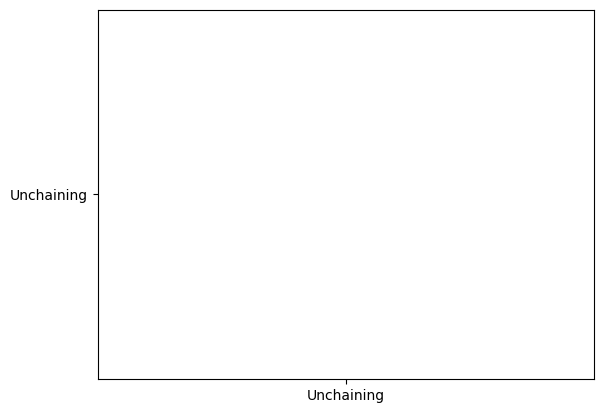

In [77]:
test_data1=test_data.sort_values('Chaining_Unchaining_Label', ascending=True)
plt.plot(test_data1['Chaining_Unchaining_Label'], test_data1['predicted_condition'])
plt.plot(test_data1['Chaining_Unchaining_Label'], test_data1['Chaining_Unchaining_Label'])

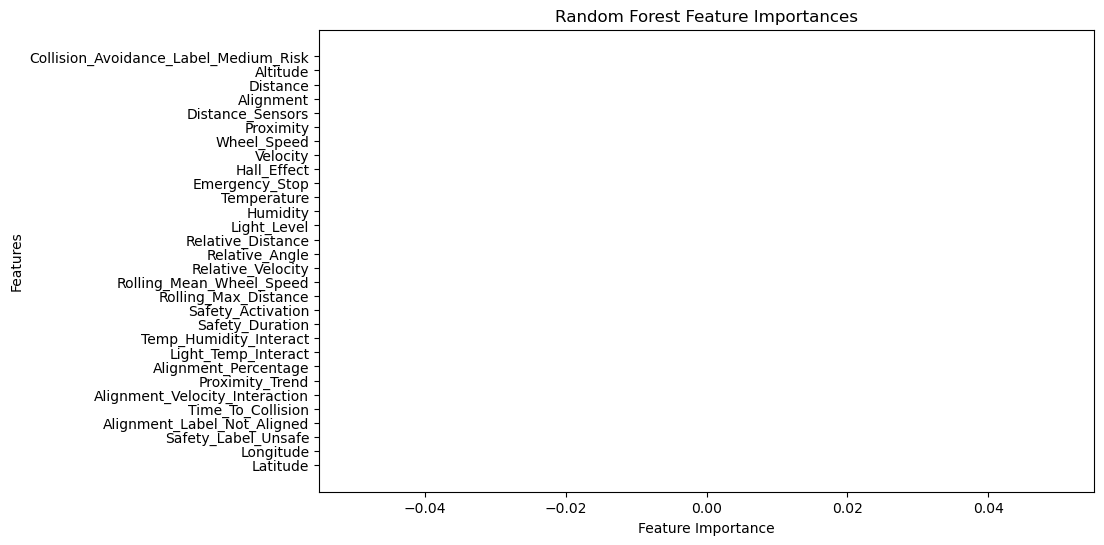

In [81]:
# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"]).sort_values("Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances["Importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importances")
plt.show()